<a href="https://colab.research.google.com/github/Femer01/Femer01/blob/main/British_Airways_Flight_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [55]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlencode
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Srapping reviews webpages: Defining the list of URL's that will be scrapped (10 pgs)

In [56]:
list_of_urls = ['https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100',
                'https://www.airlinequality.com/airline-reviews/british-airways/page/2/?sortby=post_date%3ADesc&pagesize=100',
                'https://www.airlinequality.com/airline-reviews/british-airways/page/3/?sortby=post_date%3ADesc&pagesize=100',
                'https://www.airlinequality.com/airline-reviews/british-airways/page/4/?sortby=post_date%3ADesc&pagesize=100',
                'https://www.airlinequality.com/airline-reviews/british-airways/page/5/?sortby=post_date%3ADesc&pagesize=100',
                'https://www.airlinequality.com/airline-reviews/british-airways/page/6/?sortby=post_date%3ADesc&pagesize=100',
                'https://www.airlinequality.com/airline-reviews/british-airways/page/7/?sortby=post_date%3ADesc&pagesize=100',
                'https://www.airlinequality.com/airline-reviews/british-airways/page/8/?sortby=post_date%3ADesc&pagesize=100',
                'https://www.airlinequality.com/airline-reviews/british-airways/page/9/?sortby=post_date%3ADesc&pagesize=100',
                'https://www.airlinequality.com/airline-reviews/british-airways/page/10/?sortby=post_date%3ADesc&pagesize=100']

Retrieving the HTML data of each URL and converting the data into beautiful soup object; finding, extracting and storing reviewer names, review titles, review text and recommendations into a list

In [57]:
names = []
titles = []
reviews = []
data_string = ""

for url in list_of_urls:
  params = {'api_key': 'e1aca96c7915c914ef5041a8c4e90bda', 'url': url}
  r = requests.get('https://api.scraperapi.com/', params=urlencode(params))
  soup = BeautifulSoup(r.text, 'html.parser')

  for item in soup.find_all("span", itemprop="name"):
    data_string = data_string + item.get_text()
    names.append(data_string)
    data_string = ""

  for item in soup.find_all("h2", class_="text_header"):
    data_string = data_string + item.get_text()
    titles.append(data_string)
    data_string = ""

  for item in soup.find_all("div", class_="text_content"):
    data_string = data_string + item.get_text()
    reviews.append(data_string)
    data_string = ""



Creating a dictionary to contain all the data extracted

In [58]:
ratings = {'Reviewer Name': names, 'Title': titles, 'Review Text': reviews}

Printing the lengths of each list

In [59]:
print(len(names), len(titles), len(reviews))

1000 1000 1000


Creating pandas Data Frame

In [60]:
DF = pd.DataFrame.from_dict(ratings, orient='index')

# Exploring the Data Frame

In [61]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Reviewer Name,K Higgins,E Gan,S Dayle,S Neale,Mick Carter,Colin Wicks,V Simpson,S Jackson,T Maddern,K Pearson,...,Anojan Sanmugarasah,Alison Conway,G Beele,M Kersen,Michael Papalamprou,Preslava Eneva,Michael Papalamprou,L Beale,S Beale,Sulekha Jimeaale
Title,"""Gate agent was extremely rude""","""incredibly heartless and incompetent company""","""their service was hit-and-miss""",""" Worse than a low-cost carrier""","""Very Poor Business class product""",“if GF - take your own food”,“pathetic business class product”,“Staff look tired and overworked”,“I couldn’t fault them”,“incompetence in customer service”,...,"""crew were very friendly""","""pay BA to check the new bag""","""would be my last choice""","""is not worth the fare""","""IT systems went down""","""overall experience was terrible""","""an amazing experience""","""both felt a bit disappointed""","""cabin staff were fantastic""","""he made my experience"""
Review Text,Not Verified | Extremely rude ground service....,✅ Trip Verified | My son and I flew to Geneva...,✅ Trip Verified | For the price paid (bought ...,✅ Trip Verified | Flight left on time and arr...,✅ Trip Verified | Very Poor Business class pr...,Not Verified | This review is for LHR-SYD-LHR....,✅ Trip Verified | Absolutely pathetic business...,Not Verified | Overall not bad. Staff look ti...,✅ Trip Verified | This was our first flight wi...,✅ Trip Verified | I recently encountered a hig...,...,✅ Trip Verified | London to Chennai. It was a...,Not Verified | London to Tampa. BA broke my s...,✅ Trip Verified | My husband and I flew on Br...,✅ Trip Verified | Bridgetown to Gatwick. I co...,✅ Trip Verified | London to Athens. Classic B...,✅ Trip Verified | I booked a British Airways ...,✅ Trip Verified | Flying premium economy on B...,✅ Trip Verified | Tokyo to London. I was look...,✅ Trip Verified | London to Tokyo Haneda. My ...,✅ Trip Verified | I was flying London to Bill...


In [62]:
#Checking for missing values
missing_values = DF.isnull().sum()

#dislaying the result
print("Missing Values:")
print(missing_values)

Missing Values:
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64


In [63]:
# Transpose the Data Frame

flight_reviews = DF.T

#printing the top 10 head
print(flight_reviews.head(10))

  Reviewer Name                                           Title  \
0     K Higgins                 "Gate agent was extremely rude"   
1         E Gan  "incredibly heartless and incompetent company"   
2       S Dayle                "their service was hit-and-miss"   
3       S Neale                " Worse than a low-cost carrier"   
4   Mick Carter              "Very Poor Business class product"   
5   Colin Wicks                    “if GF - take your own food”   
6    V Simpson                “pathetic business class product”   
7     S Jackson               “Staff look tired and overworked”   
8     T Maddern                         “I couldn’t fault them”   
9     K Pearson              “incompetence in customer service”   

                                         Review Text  
0  Not Verified |  Extremely rude ground service....  
1  ✅ Trip Verified |  My son and I flew to Geneva...  
2  ✅ Trip Verified |  For the price paid (bought ...  
3  ✅ Trip Verified |  Flight left on time 

Converting the data frame to CSV

In [64]:
flight_reviews.to_csv('f_reviews.csv', index=False, header=True)

In [65]:
flight_reviews.shape

(1000, 3)

In [66]:
flight_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reviewer Name  1000 non-null   object
 1   Title          1000 non-null   object
 2   Review Text    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


# Instantiating Sentiment Analyser

In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

# Extracting values from the data frame and creating new columns

In [68]:
flight_reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in flight_reviews['Review Text']]
flight_reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in flight_reviews['Review Text']]
flight_reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in flight_reviews['Review Text']]
flight_reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in flight_reviews['Review Text']]


In [69]:
flight_reviews.head()

,Reviewer Name,Title,Review Text,compound,neg,neu,pos
0,K Higgins,"""Gate agent was extremely rude""",Not Verified | Extremely rude ground service....,0.1824,0.090,0.815,0.094
1,E Gan,"""incredibly heartless and incompetent company""",✅ Trip Verified | My son and I flew to Geneva...,-0.8462,0.101,0.838,0.061
2,S Dayle,"""their service was hit-and-miss""",✅ Trip Verified | For the price paid (bought ...,0.7708,0.050,0.866,0.085
3,S Neale,""" Worse than a low-cost carrier""",✅ Trip Verified | Flight left on time and arr...,-0.9531,0.126,0.859,0.015
4,Mick Carter,"""Very Poor Business class product""",✅ Trip Verified | Very Poor Business class pr...,-0.7082,0.128,0.812,0.061


In [70]:
flight_reviews[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.029680,0.083475,0.813024,0.103513
std,0.788870,0.058492,0.078967,0.088541
min,-0.997400,0.000000,0.453000,0.000000
25%,-0.789550,0.040000,0.769000,0.041750
50%,-0.012350,0.075000,0.821000,0.077500
75%,0.903225,0.117250,0.868000,0.146000
max,0.999200,0.338000,1.000000,0.479000


<Axes: xlabel='compound', ylabel='Count'>

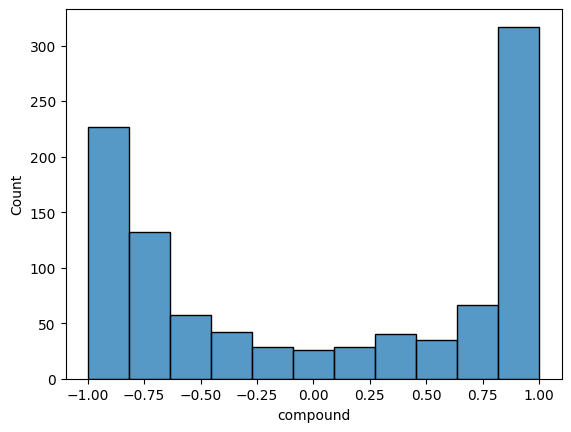

In [71]:
#visualizing the distribution of compound scores
sns.histplot(flight_reviews['compound'])

<Axes: xlabel='pos', ylabel='Count'>

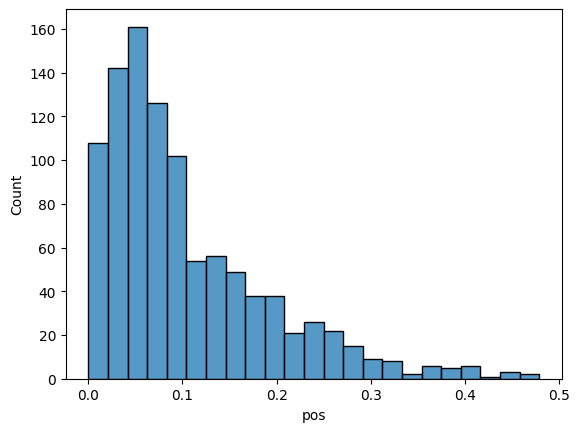

In [72]:
#visualizing the distribution of positive scores
sns.histplot(flight_reviews['pos'])

<Axes: xlabel='neg', ylabel='Count'>

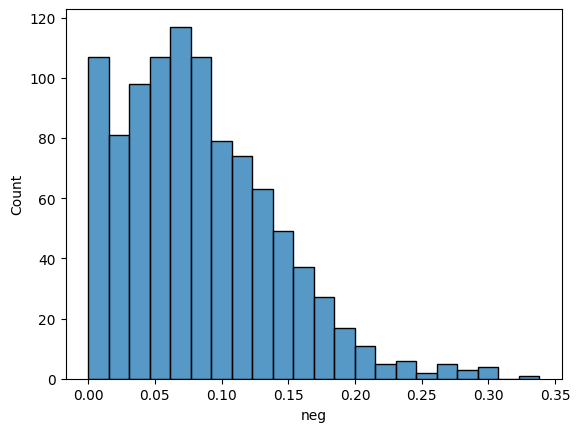

In [73]:
#visualizing the distribution of negative scores
sns.histplot(flight_reviews['neg'])

Calculating the total number of positive, negative and neutral reviews

In [74]:
(flight_reviews['compound']<0).sum()

500

In [75]:
(flight_reviews['compound']>0).sum()

495

In [76]:
(flight_reviews['compound']==0).sum()

5

#WordCloud visualization

In [77]:
#defining the necessary functions
stop_words = nltk.corpus.stopwords.words('english')

In [78]:
# Cleaning the Review Text

def remove_special_characters(text):

  # Defining a regex pattern to match special characters

  pattern = r'[^a-zA-Z0-9\s]' # keeping only letters, numbers, and white spaces

  #using the sub() function to replace matched patterns with empty strings

  cleaned_text = re.sub(pattern, '', text)

  return cleaned_text

cleaned_reviews = remove_special_characters('Review Text')

In [79]:
# Creating a function to apply for data preprocessing steps
def preprocess_txt(text):
  tokenized_doc = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_doc if word.lower() not in stop_words] #removing tokens
  stemmed_txt = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #stemming
  return stemmed_txt

In [80]:
#Processing data for wordcloud visualization using user defined function

flight_reviews['processed_review'] = flight_reviews[cleaned_reviews].apply(preprocess_txt)

reviews_pos_subset = flight_reviews.loc[flight_reviews['compound']>0, :]

reviews_neg_subset = flight_reviews.loc[flight_reviews['compound']<0, :]

reviews_neu_subset = flight_reviews.loc[flight_reviews['compound']==0, :]

reviews_neg_subset.head()





,Reviewer Name,Title,Review Text,compound,neg,neu,pos,processed_review
1,E Gan,"""incredibly heartless and incompetent company""",✅ Trip Verified | My son and I flew to Geneva...,-0.8462,0.101,0.838,0.061,"[trip, verifi, son, flew, geneva, last, sunday..."
3,S Neale,""" Worse than a low-cost carrier""",✅ Trip Verified | Flight left on time and arr...,-0.9531,0.126,0.859,0.015,"[trip, verifi, flight, left, time, arriv, half..."
4,Mick Carter,"""Very Poor Business class product""",✅ Trip Verified | Very Poor Business class pr...,-0.7082,0.128,0.812,0.061,"[trip, verifi, poor, busi, class, product, ba,..."
9,K Pearson,“incompetence in customer service”,✅ Trip Verified | I recently encountered a hig...,-0.8855,0.139,0.769,0.092,"[trip, verifi, recent, encount, highli, disapp..."
10,C Shaw,“The most ridiculous thing I've heard”,Not Verified | Beware! BA don't provide any r...,-0.9474,0.130,0.853,0.017,"[verifi, bewar, ba, provid, refund, due, serio..."


#Generating WordCloud of Reviews

In [81]:
from collections import Counter

In [82]:
#Generating wordcloud of words from negative reviews

def generate_wordcloud(text):
  #Generate a word cloud from text
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text)
  #Displaying the generated image:
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

# Negative Word Cloud

In [83]:
neg_ = ''.join(reviews_neg_subset['Review Text'])

neg_rev =[word.lower() for word in neg_.split()]

print(neg_rev)

['✅', 'trip', 'verified', '|', 'my', 'son', 'and', 'i', 'flew', 'to', 'geneva', 'last', 'sunday', 'for', 'a', 'skiing', 'holiday', 'in', 'les', 'arc.', 'the', 'flight', 'was', 'cancelled', 'moments', 'prior', 'to', 'boarding', 'and', 'we', 'were', 'transferred', 'to', 'a', 'flight', 'departing', 'three', 'and', 'a', 'half', 'hours', 'later,', 'that', 'then', 'got', 'delayed', 'by', 'a', 'further', 'three', 'hours.', 'they', "didn't", 'load', 'any', 'food', 'on', 'to', 'the', 'plane', 'and', 'forgot', 'to', 'load', 'the', 'baggage', 'for', 'all', 'the', 'business', 'class', 'passengers', 'who', 'had', 'been', 'on', 'the', 'earlier', 'flight.', 'problems', 'happen,', "it's", 'a', 'complex', 'operation.', 'what', 'is', 'totally', 'unacceptable', 'is', 'the', 'service', 'one', 'receives', 'when', 'there', 'is', 'a', 'problem.', 'the', 'offshore', 'call', 'centres', 'are', 'unhelpful', 'and', 'obstructive,', 'wanting', 'to', 'fob', 'off', 'issues', 'by', 'getting', 'the', 'customer', 'to', 

In [84]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  filtered_words = [word for word in words if words.lower() not in stop_words]
  return ''.join(filtered_words)

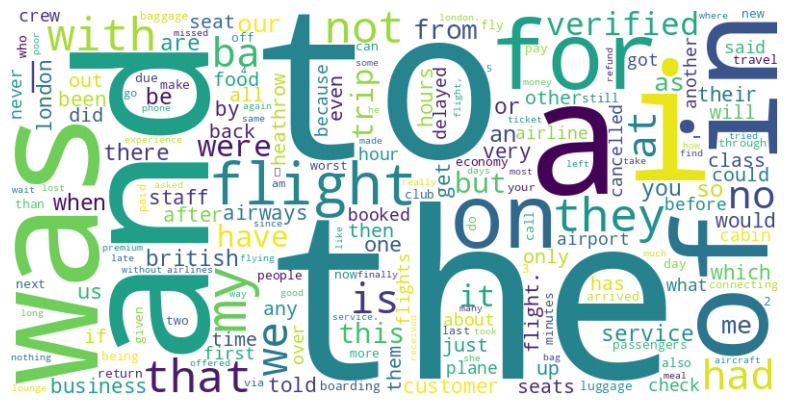

In [85]:
# Generate and display neg word cloud
word_count = Counter(neg_rev)

generate_wordcloud(word_count)

# Positive Word Cloud

In [86]:
pos_ = ''.join(reviews_pos_subset['Review Text'])

pos_rev =[word.lower() for word in pos_.split()]

print(pos_rev)

['not', 'verified', '|', 'extremely', 'rude', 'ground', 'service.', 'we', 'were', 'non-rev', 'flying', 'and', 'london', 'was', 'our', 'connection/layover.', 'gate', 'agent', 'was', 'extremely', 'rude', 'and', 'forced', 'me', 'to', 'check', 'my', 'carry', 'on', 'suitcase', 'with', 'the', 'explanation', 'that', 'it', 'was', '“oversized.”', 'however,', 'when', 'i', 'put', 'it', 'in', 'the', 'sizer,', 'it', 'fit', 'perfectly', 'without', 'force.', 'the', 'plane', 'was', 'not', 'fully', 'booked', 'and', 'had', 'lots', 'of', 'room', 'overhead.', 'the', 'gate', 'agent', 'was', 'insistent', 'and', 'rushed', 'us', 'with', 'no', 'regard', 'for', 'the', 'fact', 'that', 'we', 'would', 'have', 'to', 'redo', 'security', 'in', 'order', 'to', 'get', 'our', 'bags', 'again,', 'as', 'we', 'were', 'switching', 'airlines', 'and', 'needed', 'to', 'carry', 'them', 'on', 'due', 'to', 'our', 'non-rev', 'status.', 'the', 'flight', 'itself', 'was', 'good,', 'attendants', 'were', 'polite', 'and', 'helpful.', 'no'

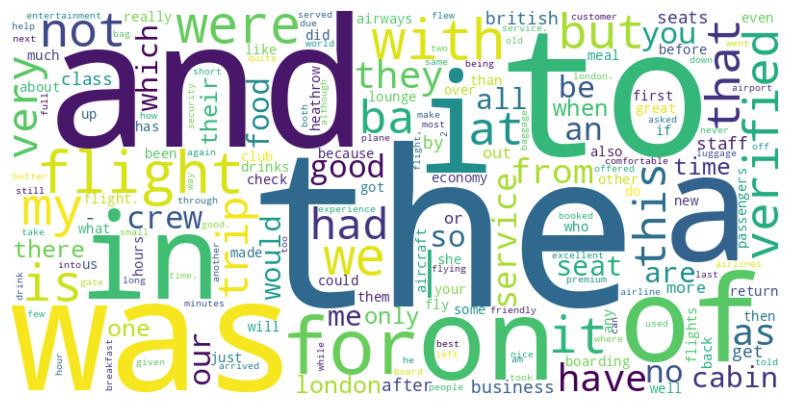

In [87]:
# Generate and display neg word cloud
word_count2 = Counter(pos_rev)

generate_wordcloud(word_count2)

Using FreqDist to understand frequently used words for Positive reviews

In [88]:
# converting split positive reviews words to string
pos_str = ' '.join(pos_rev)

print(pos_str)

not verified | extremely rude ground service. we were non-rev flying and london was our connection/layover. gate agent was extremely rude and forced me to check my carry on suitcase with the explanation that it was “oversized.” however, when i put it in the sizer, it fit perfectly without force. the plane was not fully booked and had lots of room overhead. the gate agent was insistent and rushed us with no regard for the fact that we would have to redo security in order to get our bags again, as we were switching airlines and needed to carry them on due to our non-rev status. the flight itself was good, attendants were polite and helpful. no complains there. just extremely unhappy with the gate agent service. i understand that it is not a pleasant job and frankly i would not be overjoyed to work there either but that does not explain why we had to be inconvenienced with no fair explanation or attention.✅ trip verified | for the price paid (bought during a sale) it was a decent experien

In [89]:
# Removing stop words from postive reviews
pos_new = preprocess_txt(pos_str)

print(pos_new)

['verifi', 'extrem', 'rude', 'ground', 'servic', 'non', 'rev', 'fli', 'london', 'connect', 'layov', 'gate', 'agent', 'extrem', 'rude', 'forc', 'check', 'carri', 'suitcas', 'explan', 'overs', 'howev', 'put', 'sizer', 'fit', 'perfectli', 'without', 'forc', 'plane', 'fulli', 'book', 'lot', 'room', 'overhead', 'gate', 'agent', 'insist', 'rush', 'us', 'regard', 'fact', 'would', 'redo', 'secur', 'order', 'get', 'bag', 'switch', 'airlin', 'need', 'carri', 'due', 'non', 'rev', 'statu', 'flight', 'good', 'attend', 'polit', 'help', 'complain', 'extrem', 'unhappi', 'gate', 'agent', 'servic', 'understand', 'pleasant', 'job', 'frankli', 'would', 'overjoy', 'work', 'either', 'explain', 'inconvenienc', 'fair', 'explan', 'attent', 'trip', 'verifi', 'price', 'paid', 'bought', 'sale', 'decent', 'experi', 'although', 'club', 'class', 'busi', 'class', 'seat', 'offer', 'legroom', 'economi', 'class', 'use', 'short', 'haul', 'fleet', '4', 'hour', 'flight', 'fast', 'track', 'secur', 'honour', 'loung', 'istanb

In [90]:
# Using nltk FreqDist to visialize the positive reviews

from nltk.probability import FreqDist

pos_fqd = FreqDist(pos_new)

pos_fqd.tabulate(15)

flight     ba   seat verifi   trip servic   time   good   crew   food london  board  cabin  check  class 
  1038    549    499    497    435    398    345    344    308    266    263    260    242    221    211 


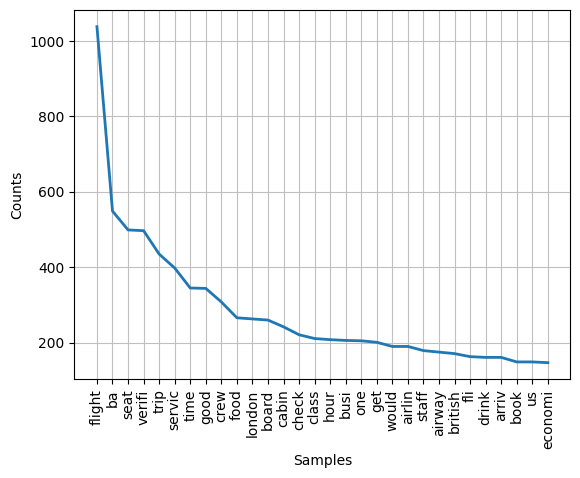

<Axes: xlabel='Samples', ylabel='Counts'>

In [91]:
pos_fqd.plot(30)

Using FreqDist to understand frequently used words for Negative reviews

In [92]:
#converting split negative review words back to string
neg_str = ' '.join(neg_rev)

print(neg_str)

✅ trip verified | my son and i flew to geneva last sunday for a skiing holiday in les arc. the flight was cancelled moments prior to boarding and we were transferred to a flight departing three and a half hours later, that then got delayed by a further three hours. they didn't load any food on to the plane and forgot to load the baggage for all the business class passengers who had been on the earlier flight. problems happen, it's a complex operation. what is totally unacceptable is the service one receives when there is a problem. the offshore call centres are unhelpful and obstructive, wanting to fob off issues by getting the customer to call special help lines that merely refer one to a webpage and then cut off. the web pages are often unable to give information as they are not updated and often refuse to update your inputs 'at this time. please try again later'. there is no access to people that are willing to help, empowered to help, or actually move a situation forwards in any wa

In [93]:
# Removing stop words from the neg reviews
neg_new = preprocess_txt(neg_str)

print(neg_new)

['trip', 'verifi', 'son', 'flew', 'geneva', 'last', 'sunday', 'ski', 'holiday', 'le', 'arc', 'flight', 'cancel', 'moment', 'prior', 'board', 'transfer', 'flight', 'depart', 'three', 'half', 'hour', 'later', 'got', 'delay', 'three', 'hour', 'load', 'food', 'plane', 'forgot', 'load', 'baggag', 'busi', 'class', 'passeng', 'earlier', 'flight', 'problem', 'happen', 'complex', 'oper', 'total', 'unaccept', 'servic', 'one', 'receiv', 'problem', 'offshor', 'call', 'centr', 'unhelp', 'obstruct', 'want', 'fob', 'issu', 'get', 'custom', 'call', 'special', 'help', 'line', 'mere', 'refer', 'one', 'webpag', 'cut', 'web', 'page', 'often', 'unabl', 'give', 'inform', 'updat', 'often', 'refus', 'updat', 'input', "'at", 'time', 'pleas', 'tri', "later'", 'access', 'peopl', 'will', 'help', 'empow', 'help', 'actual', 'move', 'situat', 'forward', 'way', "we'v", 'sit', 'hotel', 'wait', 'bag', 'arriv', 'two', 'half', 'day', 'unabl', 'ski', 'due', 'entir', 'wardrob', 'case', 'outdat', 'luggag', "'track", "system

In [94]:
# visializing the negative reviews

neg_fqd = FreqDist(neg_new)

neg_fqd.tabulate(15)

 flight      ba  verifi    trip    seat    hour  servic    time  london  airlin     get      us british  cancel  airway 
   1151     631     506     463     432     381     366     296     290     270     255     249     245     244     241 


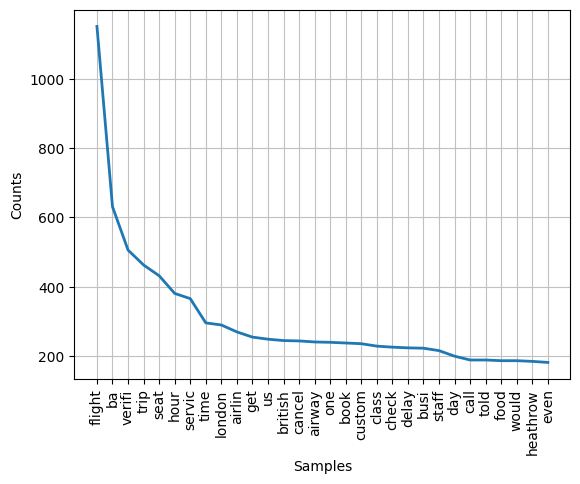

<Axes: xlabel='Samples', ylabel='Counts'>

In [95]:
neg_fqd.plot(30)